In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('Example-bank-data.csv')
df.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


In [7]:
data = df.drop('Unnamed: 0', axis=1)
data.head()

,duration,y
0,117,no
1,274,yes
2,167,no
3,686,yes
4,157,no


In [8]:
data['y'] = data['y'].map({'no':0, 'yes':1})
data.head()

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


In [21]:
x = data['duration']
x_matrix = x.values.reshape(-1,1)

In [22]:
y = data['y']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: y, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_matrix, y, test_size=0.2)

In [24]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

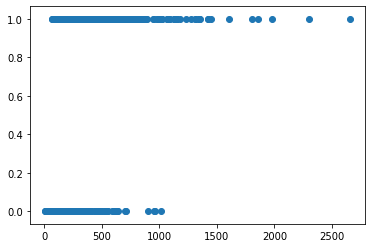

In [25]:
plt.scatter(x_matrix, y)
plt.show()

In [26]:
y_pred = reg.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [27]:
reg.coef_

array([[0.00537879]])

In [28]:
reg.intercept_

array([-1.81394806])

In [31]:
reg.score(x_matrix, y)

0.694980694980695

In [32]:
new_data = pd.DataFrame({'duration':[900, 167, 820, 400, 300, 290, 450, 600,700]})
new_data

,duration
0,900
1,167
2,820
3,400
4,300
5,290
6,450
7,600
8,700


In [33]:
reg.predict(new_data)

array([1, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)